# Dataset Characteristic of Sales data

Data contain the turnover (Umsatz) in EUR for a product categorie on a date.

This are the contained product categories:

    1 : Bread
    2 : Rolls
    3 : Croissant
    4 : Confectionery
    5 : Cake
    6 : Seasonal Bread


In [3]:
# read salesdata in data frame and prepare matplot for later diagrams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sales_data = pd.read_csv('../bakery_sales_data/umsatzdaten_gekuerzt.csv')

# convert for later calculation into datetime type
sales_data['Datum'] = pd.to_datetime(sales_data['Datum'])

## Basic information

In [4]:
print(sales_data.head(3))
print("\n")
print(sales_data.tail(3))
print("\n")
print(sales_data.sample(5))
print("\n")
sales_data.info()

       Datum  Warengruppe      Umsatz
0 2013-07-01            1  148.828353
1 2013-07-02            1  159.793757
2 2013-07-03            1  111.885594


          Datum  Warengruppe     Umsatz
9331 2017-12-23            6  84.062223
9332 2017-12-24            6  60.981969
9333 2017-12-27            6  34.972644


          Datum  Warengruppe      Umsatz
7861 2015-04-13            5  228.441056
4476 2015-10-31            3  136.923512
5269 2018-01-22            3  106.618253
2832 2016-04-28            2  253.333172
4871 2016-12-08            3   85.908416


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datum        9334 non-null   datetime64[ns]
 1   Warengruppe  9334 non-null   int64         
 2   Umsatz       9334 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 218.9 KB


- We have 9334 Entries in set
- One value is date of collected sales data in format YYYY-MM-DD
- One value is "Warengruppe" that looks like an interer number that refer to a product group
- "Umsatz" presumably represents the turnover of a product group on a certain day in EUR currency. Interestingly, the values here are stored with six decimal places and in float data type. in CSV, even with up to 12 decimal places, this does not seem necessary for the representation of a turnover value

In [7]:
# calculate some more values per product group 
sales_data_stats = sales_data.groupby('Warengruppe').agg(
    Durchschnittsumsatz=('Umsatz', 'mean'),
    Varianz=('Umsatz', 'var'),
    Standardabweichung=('Umsatz', 'std'),
    Minimum=('Umsatz', 'min'),
    Maximum=('Umsatz', 'max'),
    Median=('Umsatz', 'median'),
    Perzentil_25=('Umsatz', lambda x: x.quantile(0.25)),
    Perzentil_75=('Umsatz', lambda x: x.quantile(0.75)),
    Anzahl_Datenpunkte=('Umsatz', 'size')
)

print(sales_data_stats)

             Durchschnittsumsatz       Varianz  Standardabweichung  \
Warengruppe                                                          
1                     122.142509   1624.026220           40.299209   
2                     402.497911  19504.973697          139.660208   
3                     163.340920   5712.080709           75.578308   
4                      87.954042   1247.389394           35.318400   
5                     276.795509   9894.826094           99.472740   
6                      66.916635   1047.983216           32.372569   

                Minimum      Maximum      Median  Perzentil_25  Perzentil_75  \
Warengruppe                                                                    
1             23.108406   416.788764  120.053295     96.436728    144.264423   
2            174.999832  1203.431130  370.834527    289.050638    492.837815   
3             37.739245   565.941679  142.808943    105.589349    201.950786   
4             27.433726   430.500089   

## Diagramms

### Date destribution of datasets

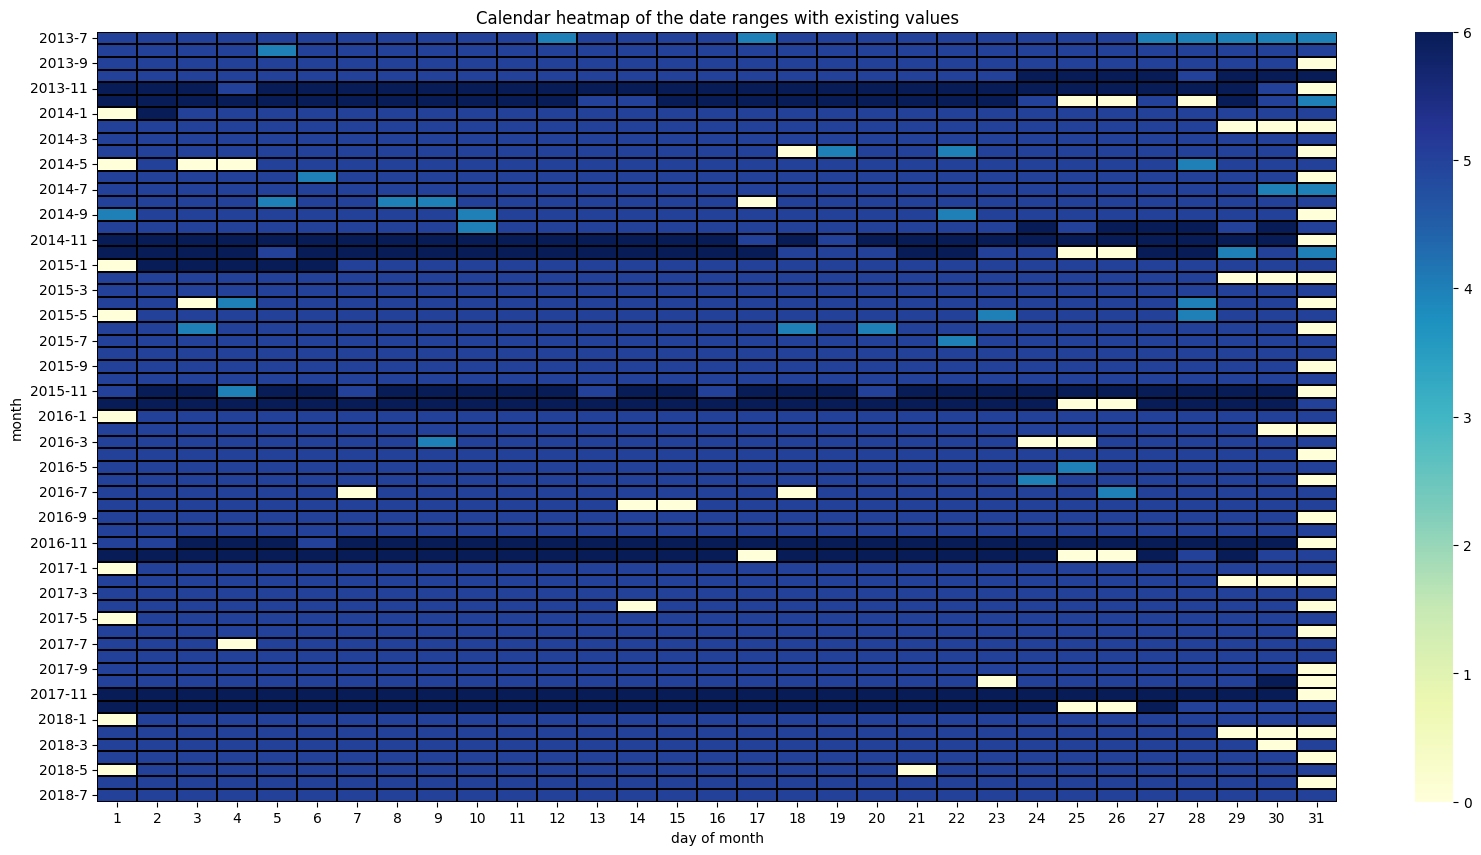

In [3]:
# Add a column for the year, month and day
sales_data['year'] = sales_data['Datum'].dt.year
sales_data['month'] = sales_data['Datum'].dt.month
sales_data['day'] = sales_data['Datum'].dt.day

# Grouping by year, month and day and counting data records
df_grouped = sales_data.groupby(['year', 'month', 'day']).size().unstack(fill_value=0)

# Create calendar heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_grouped, cmap='YlGnBu', linewidths=0.1, linecolor='black')
plt.title('Calendar heatmap of the date ranges with existing values')
plt.xlabel('day of month')
plt.ylabel('month')
plt.show()

Findings: There are up to 6 product group entries in one day. But sometimes there are fewer.

In [13]:
# find oldest and latest date entry
min_date = sales_data['Datum'].min()
max_date = sales_data['Datum'].max()

print(f"Oldest date: {min_date}")
print(f"Latest date: {max_date}")

# Create a complete list of date values in the range from the oldest to the most recent date
all_dates = pd.date_range(start=min_date, end=max_date)

# Check which data in this area has no sales value
existing_dates = sales_data['Datum'].unique()
missing_dates = all_dates.difference(existing_dates)

print("Data in the period without sales values:")
print(missing_dates)

Oldest date: 2013-07-01 00:00:00
Latest date: 2018-07-31 00:00:00
Data in the period without sales values:
DatetimeIndex(['2013-12-25', '2013-12-26', '2013-12-28', '2014-01-01',
               '2014-04-18', '2014-05-01', '2014-05-03', '2014-05-04',
               '2014-08-17', '2014-12-25', '2014-12-26', '2015-01-01',
               '2015-04-03', '2015-05-01', '2015-12-25', '2015-12-26',
               '2016-01-01', '2016-03-24', '2016-03-25', '2016-07-07',
               '2016-07-18', '2016-08-14', '2016-08-15', '2016-12-17',
               '2016-12-25', '2016-12-26', '2017-01-01', '2017-04-14',
               '2017-05-01', '2017-07-04', '2017-10-23', '2017-10-31',
               '2017-12-25', '2017-12-26', '2018-01-01', '2018-03-30',
               '2018-05-01', '2018-05-21'],
              dtype='datetime64[ns]', freq=None)


In addition to the start and end date of the data set, the list of missing sales shows that this is apparently always the case on public holidays, such as 1 May, when the shop is presumably always closed!

### List all the contained values of "Warengruppe"

In [11]:
# Calculate the different Warengruppen
unique_product_groups = sales_data['Warengruppe'].unique()

print("Different Warengruppen:")
print(unique_product_groups)

Different Warengruppen:
[1 2 3 4 5 6]


Finding: There a only 1 to 6 as possible value for "Warengruppe"

### Check if more than one entry per date + product group exists

In [10]:
# Group by 'Datum' and 'Warengruppe' and count the number of entries
grouped_sales_data = sales_data.groupby(['Datum', 'Warengruppe']).size().reset_index(name='Count')

# Filter the groups with more than one entry
multiple_entries = grouped_sales_data[grouped_sales_data['Count'] > 1]

# Display the results
print("Entries with multiple sales per product group:")
print(multiple_entries)

Entries with multiple sales per product group:
Empty DataFrame
Columns: [Datum, Warengruppe, Count]
Index: []


Finding: There are only unique combinations of "Warengruppe" and "Datum" in Dataset.

## Turnover data per product group

Analyse the turnover value by show turnover per day for one product group

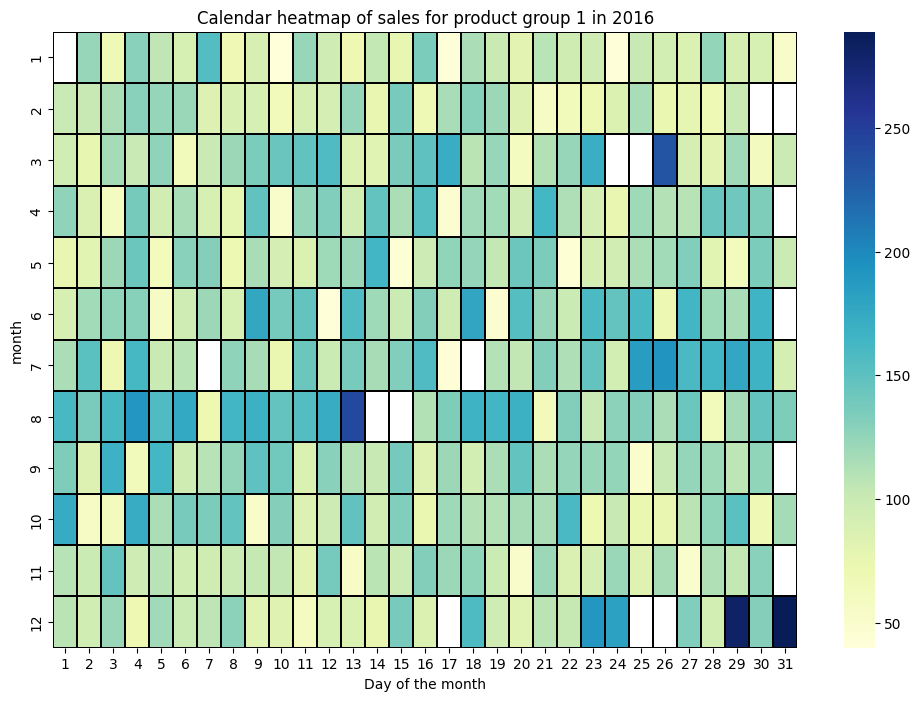

In [13]:
# Filter by productgroup 1 and year 2016
sales_data_product1 = sales_data[(sales_data['Warengruppe'] == 1) & (sales_data['year'] == 2016)]


# Pivot-Tabelle erstellen
pivot_table = sales_data_product1.pivot(index='month', columns='day', values='Umsatz')

# Kalender-Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.1, linecolor='black')
plt.title('Calendar heatmap of sales for product group 1 in 2016')
plt.xlabel('Day of the month')
plt.ylabel('month')
plt.show()

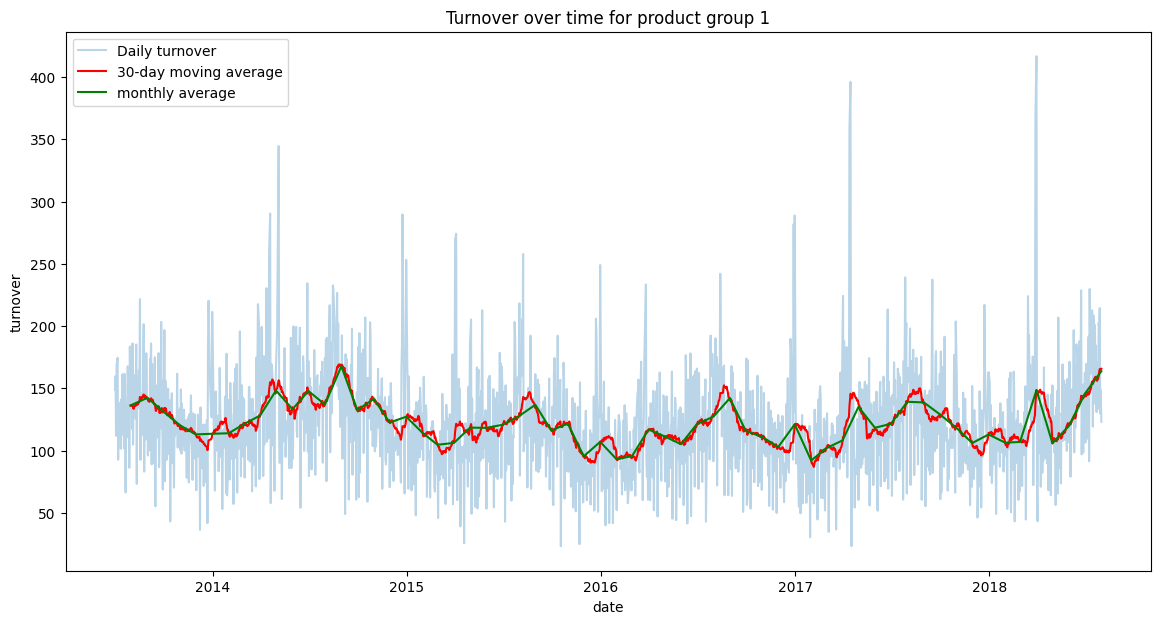

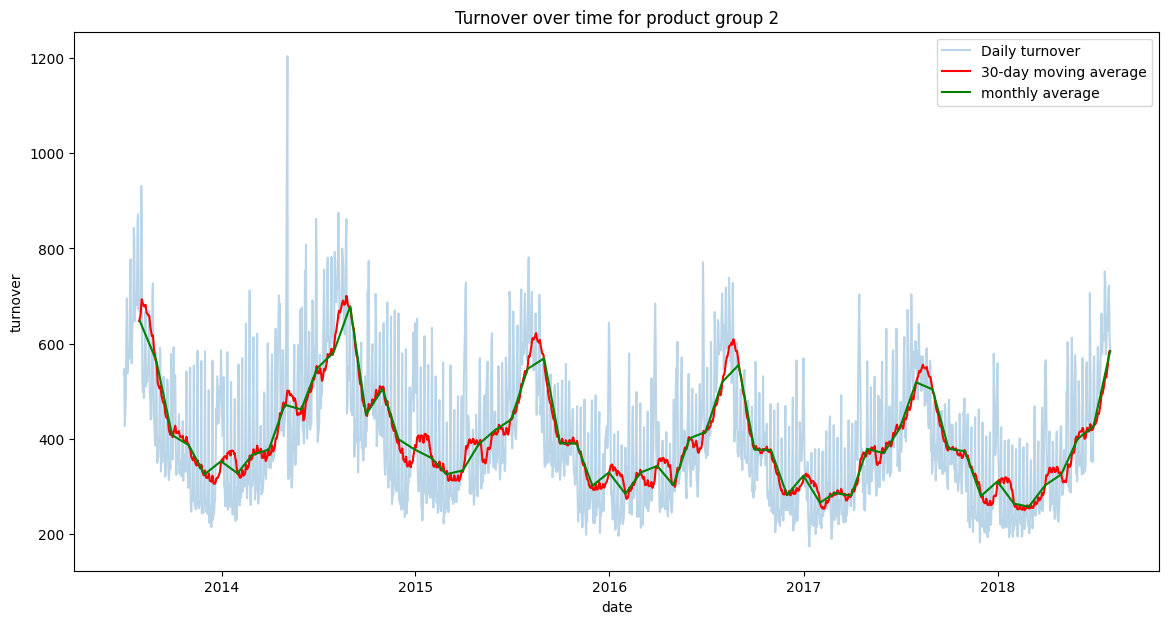

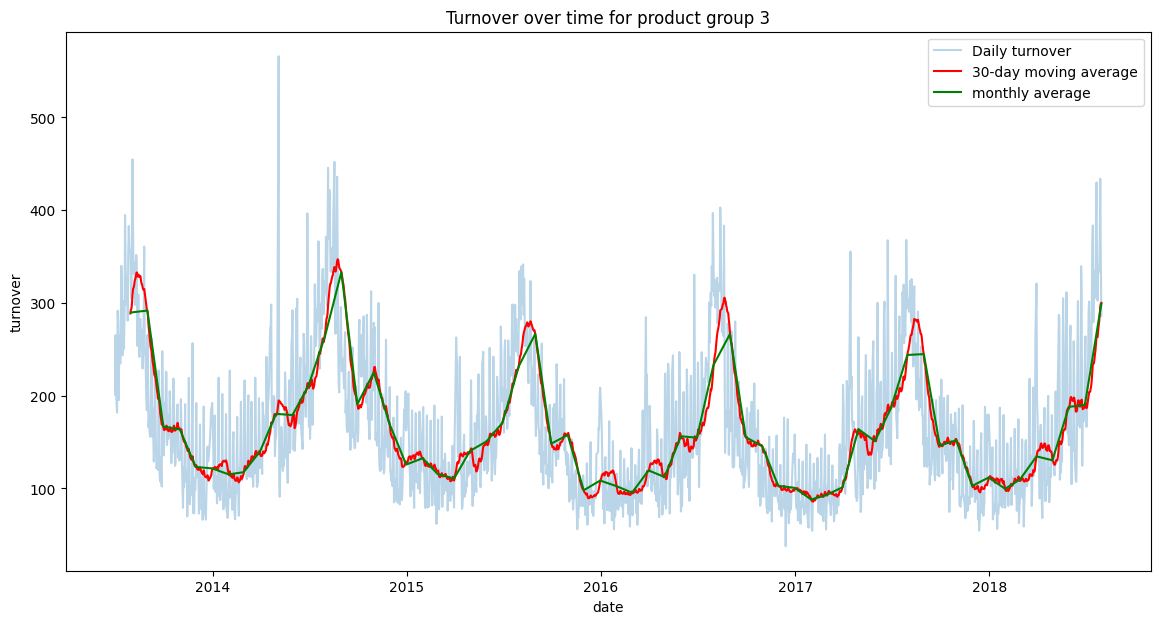

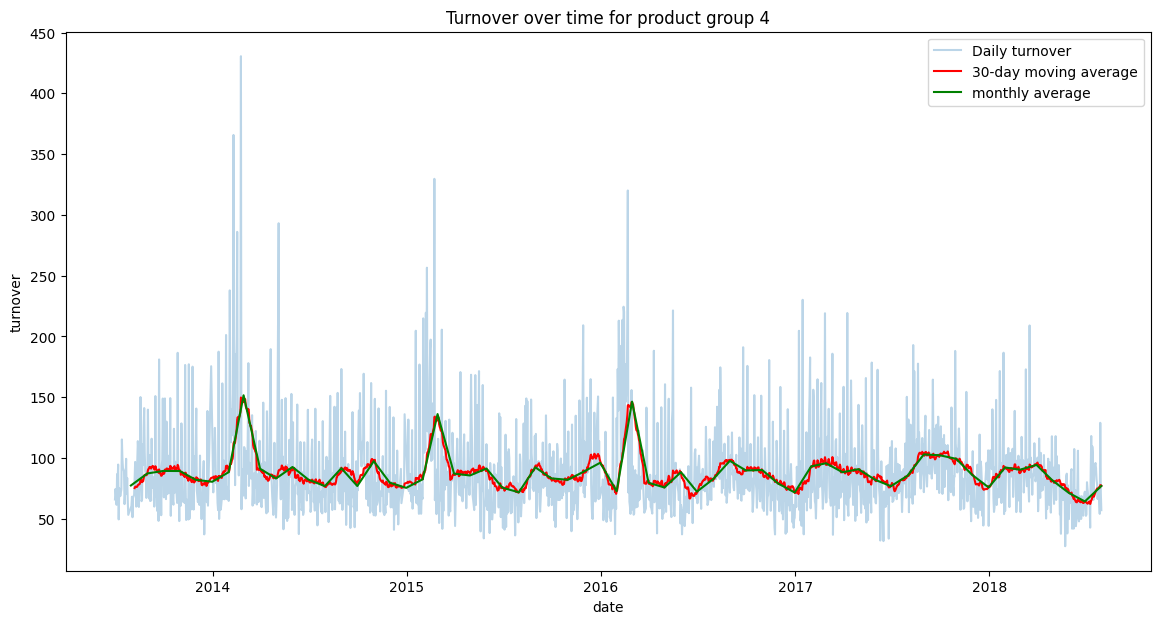

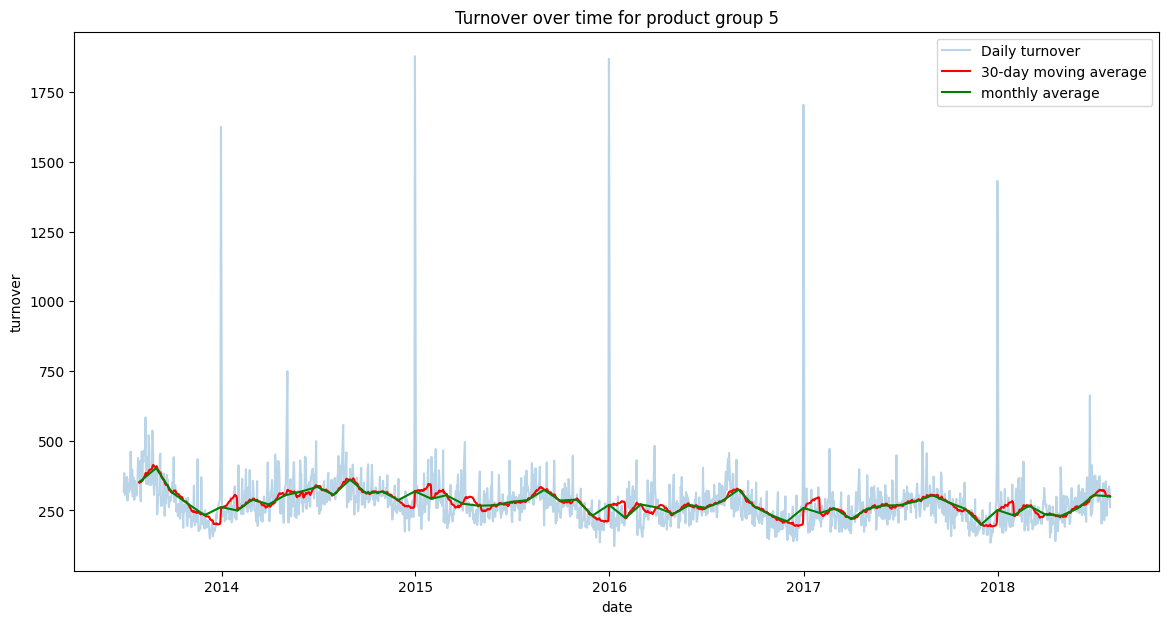

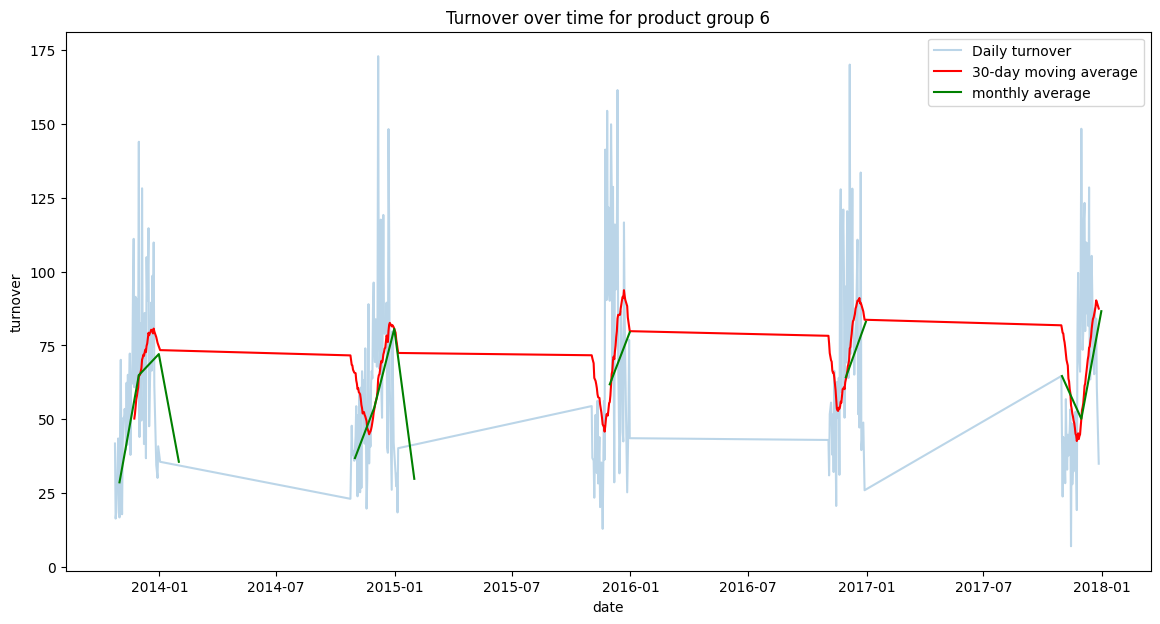

In [20]:

def plot_sales_for_group(sales_data, warengruppe):
    # Select product group
    sales_data_pg = sales_data[sales_data['Warengruppe'] == warengruppe].copy()

    # Time series plot
    plt.figure(figsize=(14, 7))
    plt.plot(sales_data_pg['Datum'], sales_data_pg['Umsatz'], alpha=0.3, label='Daily turnover')

    # Moving average (e.g. 30-day window)
    sales_data_pg['Gleitender Durchschnitt'] = sales_data_pg['Umsatz'].rolling(window=30).mean()
    plt.plot(sales_data_pg['Datum'], sales_data_pg['Gleitender Durchschnitt'], color='red', label='30-day moving average')

    # Resampling (monthly average)
    monthly_avg = sales_data_pg.resample('ME', on='Datum').mean()
    plt.plot(monthly_avg.index, monthly_avg['Umsatz'], color='green', label='monthly average')

    plt.title(f'Turnover over time for product group {warengruppe}')
    plt.xlabel('date')
    plt.ylabel('turnover')
    plt.legend()
    plt.show()


# loop over product groups and create diagrams
for warengruppe in sales_data['Warengruppe'].unique():
    plot_sales_for_group(sales_data, warengruppe)

### Limit data for diagramms only to 2017 to show more details

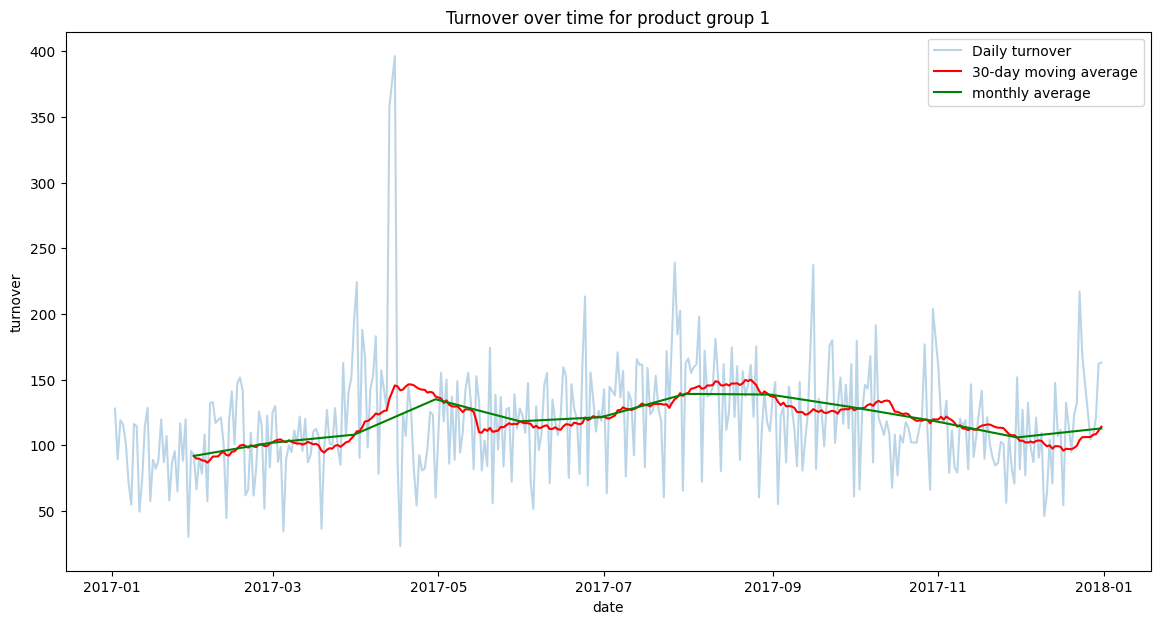

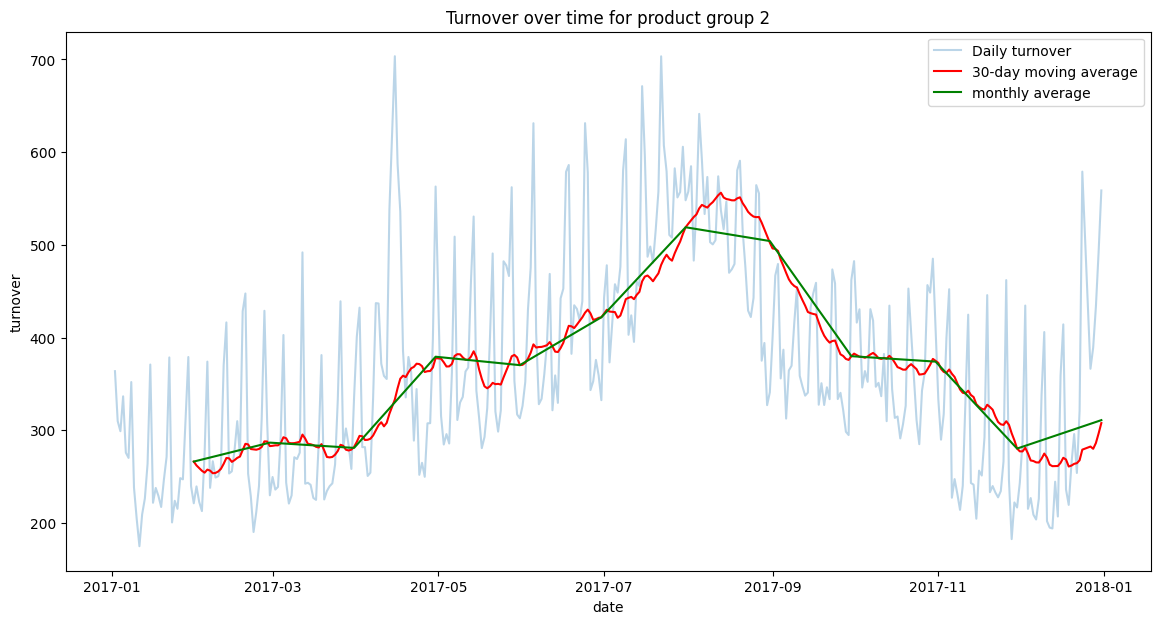

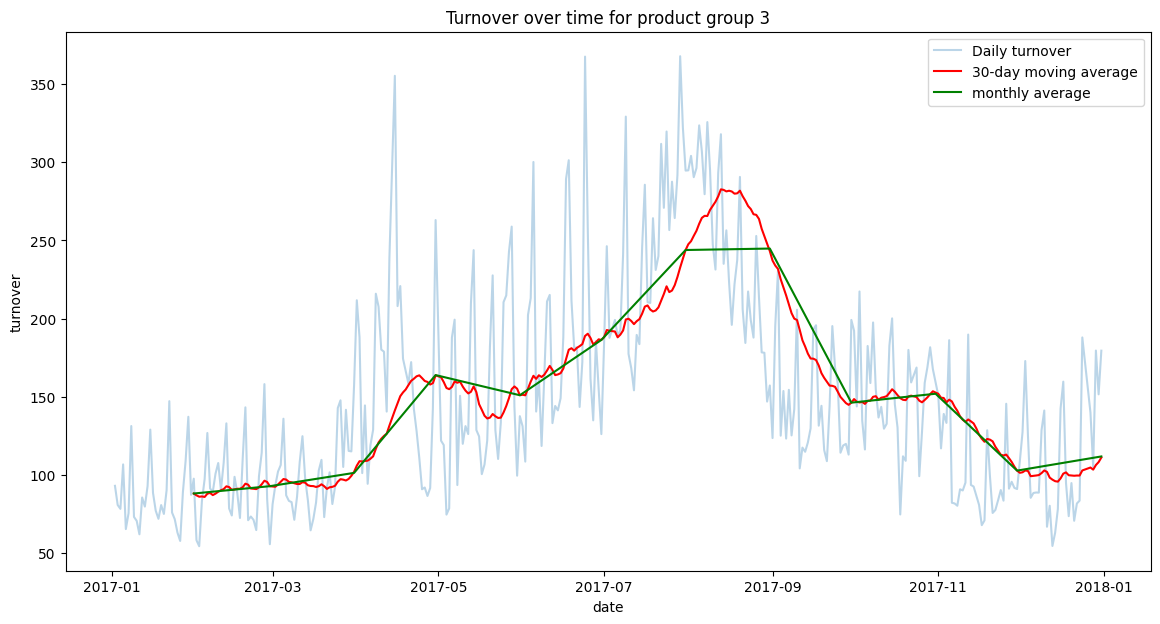

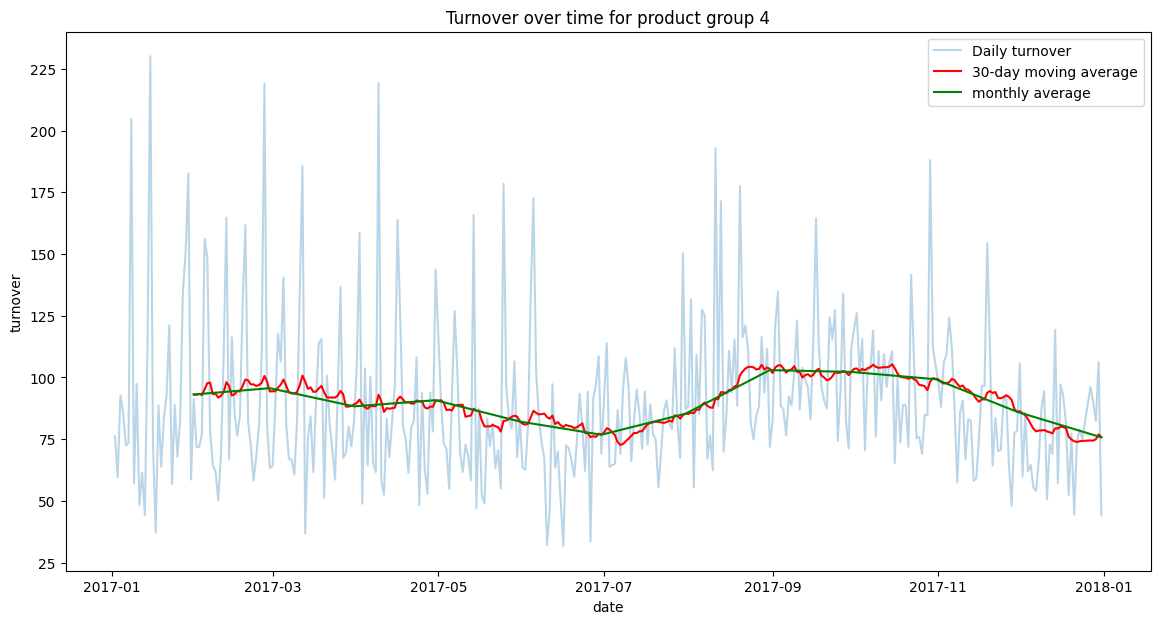

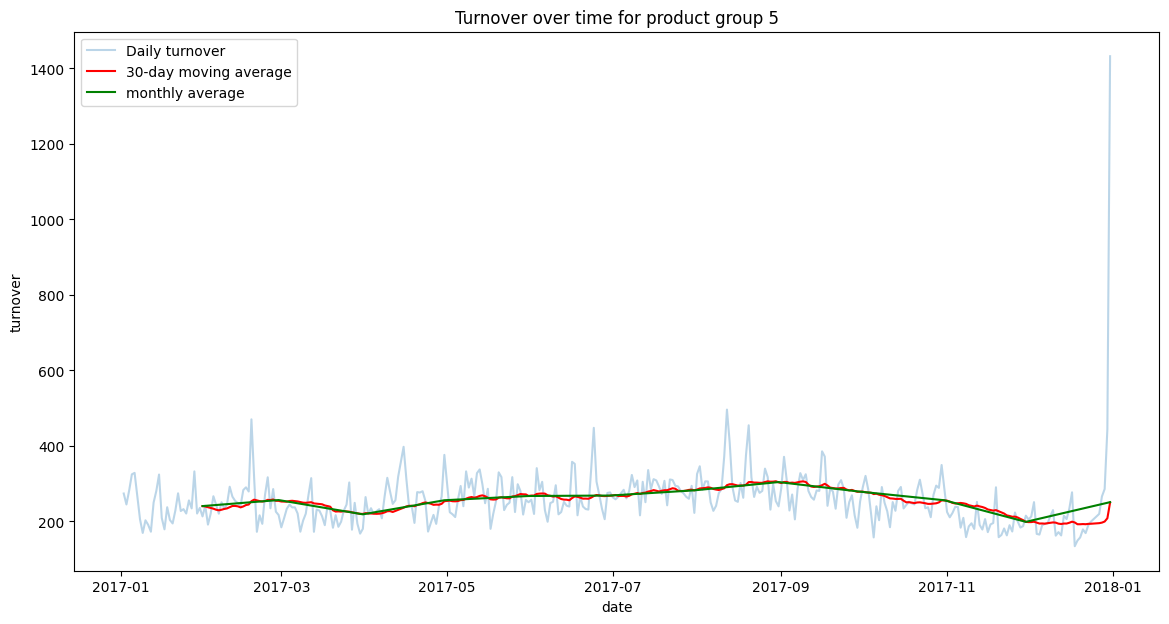

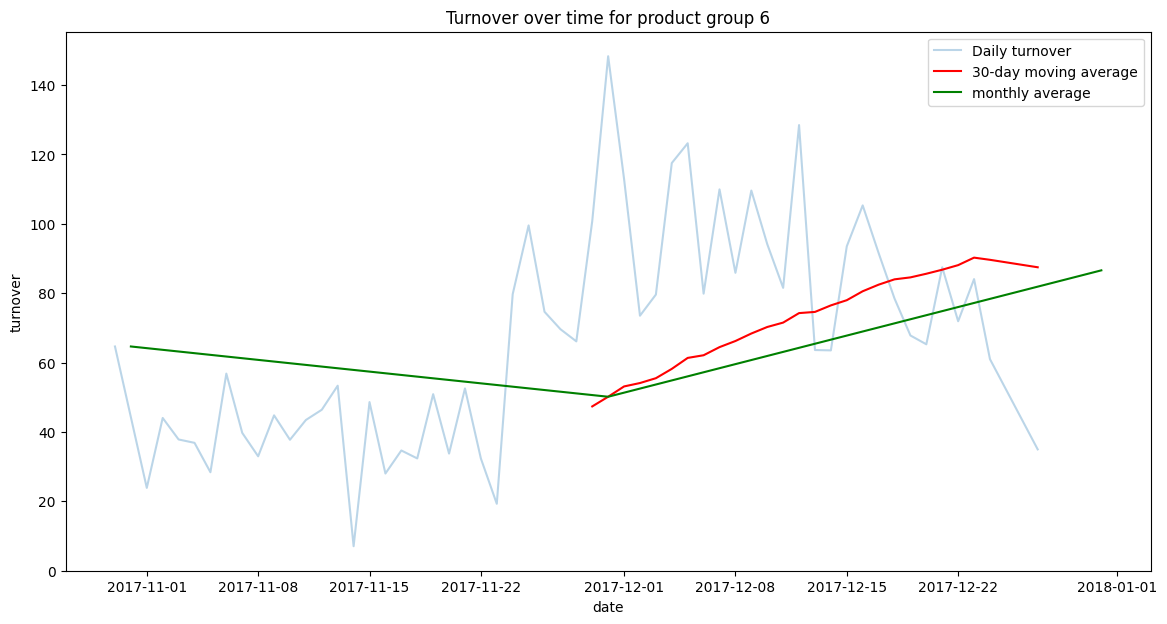

In [21]:
# to show more details for one year, pick only 2017 values
sales_data_2017 = sales_data[sales_data['Datum'].dt.year == 2017]

# loop over product groups and create diagrams
for warengruppe in sales_data_2017['Warengruppe'].unique():
    plot_sales_for_group(sales_data_2017, warengruppe)